#  Prosper Loan Data Exploration

## by Fatin Shariff

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
loan_raw=pd.read_csv('prosperLoanData.csv')
loan_raw.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan_raw.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [4]:
#sorting the data base on listing to make it easier to investigate the duplicates
loan_raw=loan_raw.sort_values(by='ListingNumber')
loan_raw[loan_raw.duplicated(subset= ['ListingKey','ListingNumber','ListingCreationDate'],keep=False)]



,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
32664,C9FF35684194774626F5F95,701942,2013-01-20 21:07:13.620000000,NaN,36,Current,NaN,0.06726,0.0605,0.0505,...,-59.65,0.0,0.0,0.0,0.0,1.0,0,0,0.0,249
33649,C9FF35684194774626F5F95,701942,2013-01-20 21:07:13.620000000,NaN,36,Current,NaN,0.06726,0.0605,0.0505,...,-59.65,0.0,0.0,0.0,0.0,1.0,0,0,0.0,249
87265,45C2357870288848093FB87,786407,2013-05-22 19:42:23.417000000,NaN,60,Current,NaN,0.24036,0.2155,0.2055,...,-61.67,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
16311,45C2357870288848093FB87,786407,2013-05-22 19:42:23.417000000,NaN,60,Current,NaN,0.24036,0.2155,0.2055,...,-61.67,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
52546,0A933581807397002C26759,812537,2013-06-18 05:51:48.647000000,NaN,60,Current,NaN,0.16294,0.1399,0.1299,...,-52.97,0.0,0.0,0.0,0.0,1.0,0,0,0.0,155
8693,0A933581807397002C26759,812537,2013-06-18 05:51:48.647000000,NaN,60,Current,NaN,0.16294,0.1399,0.1299,...,-52.97,0.0,0.0,0.0,0.0,1.0,0,0,0.0,155
86576,69193581027926463F04C25,815571,2013-06-19 18:45:06.400000000,NaN,36,Current,NaN,0.13301,0.1050,0.0950,...,-30.11,0.0,0.0,0.0,0.0,1.0,0,0,0.0,130
25504,69193581027926463F04C25,815571,2013-06-19 18:45:06.400000000,NaN,36,Current,NaN,0.13301,0.1050,0.0950,...,-30.11,0.0,0.0,0.0,0.0,1.0,0,0,0.0,130
88484,BE543583351925449316AB8,822680,2013-06-28 04:52:55.590000000,NaN,36,Current,NaN,0.21699,0.1800,0.1700,...,-4.93,0.0,0.0,0.0,0.0,1.0,0,0,0.0,23
64448,BE543583351925449316AB8,822680,2013-06-28 04:52:55.590000000,NaN,36,Current,NaN,0.21699,0.1800,0.1700,...,-4.93,0.0,0.0,0.0,0.0,1.0,0,0,0.0,23


In [5]:
loan=loan_raw.drop_duplicates(subset= ['ListingKey','ListingNumber','ListingCreationDate'],keep='first')



In [6]:
columns_loan=['Term', 'LoanStatus', 'BorrowerAPR','LenderYield','EstimatedLoss',
              'EstimatedReturn', 'ProsperRating (numeric)','ProsperRating (Alpha)',
              'ListingCategory (numeric)','DebtToIncomeRatio',
              'StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment']

In [7]:
# narrow the dataset with interested variables
loan=loan.loc[:,columns_loan]
loan.sample(10)

,Term,LoanStatus,BorrowerAPR,LenderYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ListingCategory (numeric),DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
2020,60,Current,0.23984,0.2050,0.1025,0.08578,3.0,D,1,0.42,3500.000000,10000,273.35
94390,36,Completed,0.26409,0.2400,NaN,NaN,NaN,NaN,0,0.11,2500.000000,1000,39.50
77045,36,Completed,0.25113,0.1835,0.1080,0.07120,3.0,D,3,NaN,3000.000000,1000,36.83
101067,36,Current,0.21434,0.1674,0.0649,0.09220,4.0,C,1,0.15,5000.000000,15000,540.33
78457,36,Current,0.29537,0.2466,0.1175,0.10790,3.0,D,3,0.30,4833.333333,5000,200.55
74729,36,Completed,0.14458,0.1225,NaN,NaN,NaN,NaN,0,0.17,3141.583333,4400,149.85
48979,36,Defaulted,0.25757,0.2300,NaN,NaN,NaN,NaN,0,0.51,2916.666667,7500,298.20
24774,36,Defaulted,0.21730,0.1850,0.0650,0.11570,4.0,C,1,0.37,4708.333333,2000,73.82
92448,36,Completed,0.29486,0.2461,0.1120,0.12800,3.0,D,7,0.32,3333.333333,4000,160.33
36781,36,Current,0.27285,0.2246,0.1025,0.10390,3.0,D,1,0.24,7325.583333,4000,155.80


In [8]:
#overview of data shape,datatypes and their statistics
print(loan.shape)
print()
print(loan.dtypes)
print(loan.describe())

(113066, 13)

Term                           int64
LoanStatus                    object
BorrowerAPR                  float64
LenderYield                  float64
EstimatedLoss                float64
EstimatedReturn              float64
ProsperRating (numeric)      float64
ProsperRating (Alpha)         object
ListingCategory (numeric)      int64
DebtToIncomeRatio            float64
StatedMonthlyIncome          float64
LoanOriginalAmount             int64
MonthlyLoanPayment           float64
dtype: object
                Term    BorrowerAPR    LenderYield  EstimatedLoss  \
count  113066.000000  113041.000000  113066.000000   83982.000000   
mean       40.800170       0.218980       0.182882       0.080417   
std        10.421518       0.080483       0.074612       0.046851   
min        12.000000       0.006530      -0.010000       0.004900   
25%        36.000000       0.156290       0.124500       0.042400   
50%        36.000000       0.209840       0.174000       0.072400   
75%     

In [9]:
# convert ProsperRating (Alpha) into ordered categorical types
rating_order = ['AA','A','B','C','D','E','HR']

ordered_rating = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = rating_order)
loan['ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(ordered_rating)

In [10]:
#Check for missing values. 
loan.isna().sum()

Term                             0
LoanStatus                       0
BorrowerAPR                     25
LenderYield                      0
EstimatedLoss                29084
EstimatedReturn              29084
ProsperRating (numeric)      29084
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
DebtToIncomeRatio             8472
StatedMonthlyIncome              0
LoanOriginalAmount               0
MonthlyLoanPayment               0
dtype: int64

The missing values for particular variables are dropped later to enable rendering their distribution plot.

### What is the structure of your dataset?

> There are 113066 loans in the dataset with 13 features  ('Term','LoanStatus','BorrowerAPR','LenderYield','EstimatedLoss',
 'EstimatedReturn', 'ProsperRating (numeric)','ProsperRating (Alpha)','ListingCategory (numeric)','DebtToIncomeRatio',
 'StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment') Most variables are numeric in nature, but the variables 'LoanStatus','ProsperRating (Alpha)','ListingCategory (numeric)' are categorical variable with the prosper rating orders as following: 

>(Low Risk) —> (High Risk) <br>
Prosper rating (Alpha):  'AA', 'A', 'B', 'C', 'D', 'E', 'HR'

>(High Risk) —> (Low Risk) <br>
Prosper rating (numeric):0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA

### What is/are the main feature(s) of interest in your dataset?

> I am interested in the features that could help in predicting the outcome of the loan status especially the defaulted and charged off loan. The next point that I am going to explore is how prosper rating affecting other loan features. Are there any trend to predict their loan status base on the borrower risk level and type of loan?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am expecting that there is a correlation between debt to income ratio(DIR) and the loan status. Is people with higher DIR is more prone to caused defaulted or charged off loan? I want know if other features like term,borrowerAPR,Estimated loss and return have any relationhip with the features of interest.


## Univariate Exploration

I'll start by looking at the distribution of the first variable of interest: Loan Status.

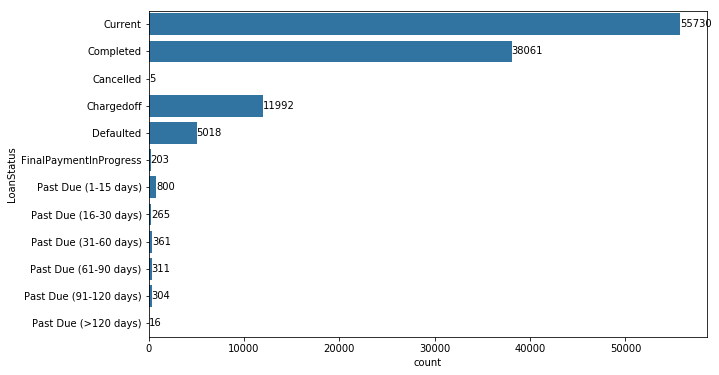

In [11]:
base_color=sb.color_palette()[0]
Status_order=['Current','Completed','Cancelled','Chargedoff', 'Defaulted', 'FinalPaymentInProgress',
            'Past Due (1-15 days)',  'Past Due (16-30 days)','Past Due (31-60 days)',
            'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)']

plt.figure(figsize=[10, 6])
sb.countplot(data = loan, y = 'LoanStatus',color=base_color,order=Status_order)
plt.ylabel('LoanStatus')

# add annotations

status_counts = loan['LoanStatus'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = status_counts[label.get_text()]
    pct_string = '{:0.0f}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(count+5,loc, pct_string, va = 'center')

Around 50% of the data are current loans. Since I am interested in defaulted, charged off and completed loans,
I will explore the data of the loan with these three status only.

We will move to next feature of interest which is PRosper Rating (Alpha).

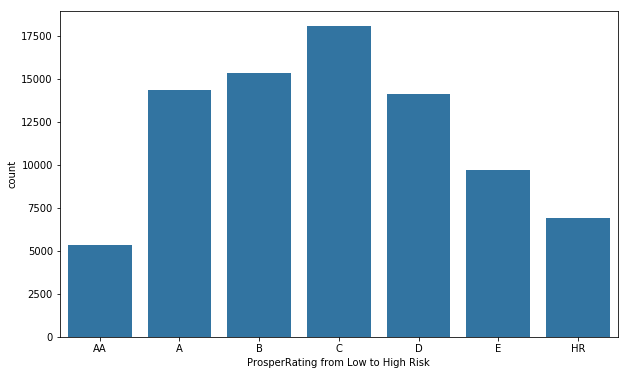

In [12]:
plt.figure(figsize=[10,6])
sb.countplot(data = loan, x = 'ProsperRating (Alpha)',color=base_color)
plt.xlabel('ProsperRating from Low to High Risk');

The chart above shows the counts for each risk level start from the lowest risk(AA) to the highest risk(HR). The distribution is quite symmetrical with the highest count in the middle for the medium risk borrower(C). The AA rating borrower are the least borrower category in this dataset with the second lowest are in the highest risk category.

We will move to next feature which is Loan Original Amount.

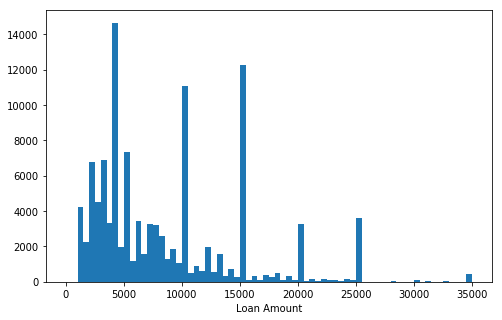

In [13]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, loan['LoanOriginalAmount'].max()+binsize, binsize)

plot=plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount');

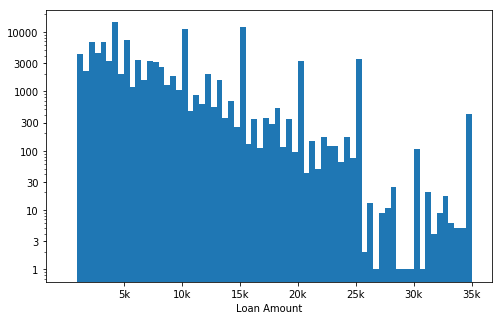

In [14]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, loan['LoanOriginalAmount'].max()+binsize, binsize)

plot=plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount')
plt.yscale('log')
tick_label=[1,3,10,30,100,300,1000,3000,10000]
plt.yticks(tick_label,tick_label)
plt.xticks([5000, 10000,15000,20000,25000,30000,35000], ['5k', '10k', '15k', '20k', '25k', '30k', '35k']);

> The distribution of the loan amount in the standard scaled plot are right skewed and multimodes. There is a very high frequecy for the loan amount in the increment of five thousand with the first highest peak at five thousand itself. This could be the standard amount of loan which the borrower commonly take or the lender usually propose for the borrower to take.
    In the log scaled distribution  we can see more clearly that frequency getting down until it reaches 25k. Between 25k and 30k show a few sudden drop of the counts but it goes up back after 30k.
    
>Next feature of interest is borrowerAPR.

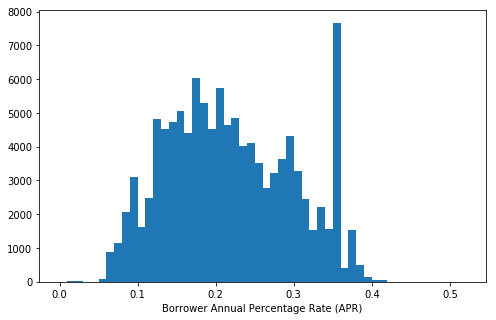

In [15]:
#dropping the NaN to avoid error when plotting histogram
loan_APR=loan.dropna(subset=['BorrowerAPR'])
binsize = 0.01
bins = np.arange(0, loan_APR['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_APR, x = 'BorrowerAPR',bins=bins)
plt.xlabel('Borrower Annual Percentage Rate (APR)');


The distribution of the borrower APR looks normally distribute with most of the APR value in the range between 0.15 to 0.25. However there is a sudden highest peak around 0.36 % of APR value. I will dig deeper regarding this peak later.

Now let's move to next variable concerning the loan which is Term.

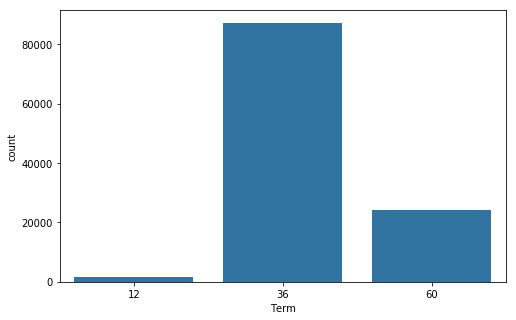

In [16]:
base_color=sb.color_palette()[0]

plt.figure(figsize=[8, 5])
sb.countplot(data = loan, x = 'Term',color=base_color)
plt.xlabel('Term');

More than half loans from the data are in the medium term which is 36 months followed secondly with the long term of 60 months. Least of the loans having short term of 12 months. 

I will now move to next predictor variable: stated monthly income.

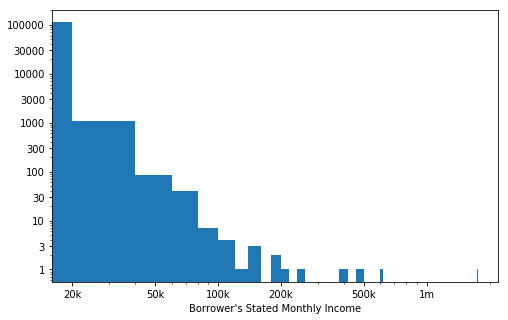

In [17]:
binsize =20000
bins = np.arange(0, loan['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'StatedMonthlyIncome',bins=bins)
plt.yscale('log')
plt.xscale('log')
yticks= [1,3,10,30,100,300,1000,3000,10000,30000,100000]
plt.xticks([2e4, 5e4, 1e5,2e5,5e5, 1e6], ['20k','50k','100k','200k','500k','1m'])
plt.yticks(yticks,yticks)
plt.xlabel('Borrower\'s Stated Monthly Income');

Most of the data lies in below 20k as it has the highest peak and the y axis is scaled to logarithmic. There are a few outliers in this distribution. This could be people with very high income or their  yearly income that are mistakenly stated as monthly income or they could simply be errors.

I tracked down their occupation as below using the raw data just to have ideas about their background.

In [18]:
loan_raw[loan_raw.StatedMonthlyIncome>200000].Occupation

8870                                  Other
57133                                 Other
8066      Police Officer/Correction Officer
17411                          Professional
53167                          Professional
82831                                 Other
53014                                 Other
113270                                Other
Name: Occupation, dtype: object

From above there is not much infos can be collected and earning more than 200k per month as a police officer does not make much sense. Since there only a few of them in this category, I decided to remove them.

In [40]:
loan=loan[loan.StatedMonthlyIncome<200000]

Next variable that I am investigating is the Listing Category

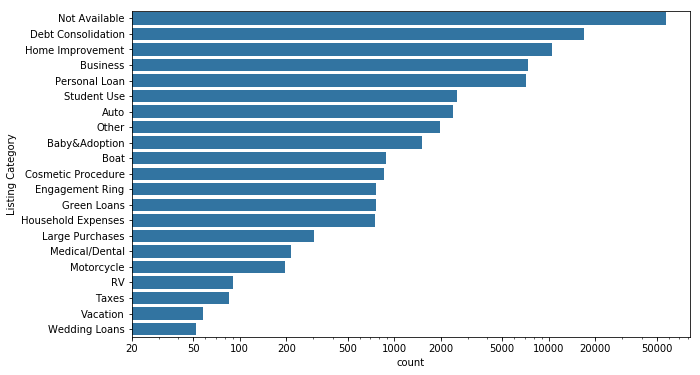

In [19]:
cat_order=loan['ListingCategory (numeric)'].value_counts().index
plt.figure(figsize=[10,6])
sb.countplot(data = loan, y = 'ListingCategory (numeric)',color=base_color,order=cat_order)
plt.ylabel('Listing Category')
list_cat=['Not Available', 'Debt Consolidation', 'Home Improvement','Business','Personal Loan','Student Use',
         'Auto', 'Other','Baby&Adoption','Boat', 'Cosmetic Procedure','Engagement Ring','Green Loans',
         'Household Expenses','Large Purchases', 'Medical/Dental','Motorcycle','RV','Taxes','Vacation',
         'Wedding Loans']
plt.xscale('log')
xtick=[20,50,100,200,500,1000,2000,5000,10000,20000,50000]
plt.xticks(xtick,xtick)

plt.yticks(np.arange(21), list_cat);

It is very interesting to see for what purposes the loan is taken. More than 10k or the loan as listed as debt consolidation as ranked top excluding majority in the unavailable category. The other top categories in order are for improving house, for business purposes and also personal.

Only few people which is 60 and below take loan for vacation and as wedding loans.

I'll now move on to the other predictor variables in the dataset: Debt to Income Ratio (DIR)

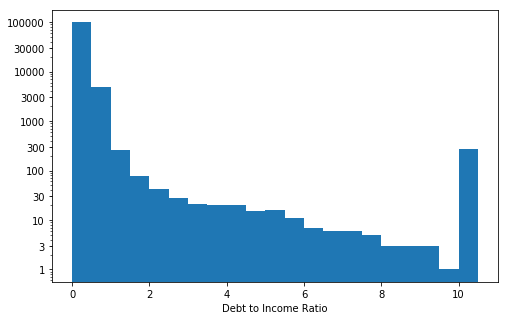

In [20]:
#dropping the NaN to avoid error when plotting histogram
loan_debt=loan.dropna(subset=['DebtToIncomeRatio'])

binsize = 0.5
bins = np.arange(0, loan_debt['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_debt, x = 'DebtToIncomeRatio',bins=bins)
plt.yscale('log')
yticks= [1,3,10,30,100,300,1000,3000,10000,30000,100000]
plt.yticks(yticks,yticks)
plt.xlabel('Debt to Income Ratio');



From the distribution above, we can conclude that the debt to income ratio(DIR) are widely distributed. 75% of the borrower have DIR less than or equal to 32% and the rest have DIR more than 32% to 1001%.

The plot also shows that frequency decrease exponentially  until it reaches the value 10. The counts is less than 10 for debt to income ratio value between 6 to 10 and there is a sudden interesting spike in the frequency for the debt income ratio value of 10 and above. This is because this value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Monthly income variable has a very large range of values and same goes to the counts for the `loan amount`, `listing category` and `DebtToIncomeRatio`. Log transformation was done for the particular chart with these variables to make it easier for the exploration part. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The were a few outliers found in the stated monthly income which lead to few assumptions. They could be that the borrower have very high monthly income or they are the annual income mistakenly stated as monthly or they could simply be an error. Since this outliers are only a few, I have decided to remove them.

>For variables like `BorrowerAPR` and `DebtToIncomeRatio`, the missing values are masked out for plotting the distribution.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [21]:
#drop rows of missing value for borrowerAPR and debt to income ratio
loan_clean=loan.dropna(subset=['BorrowerAPR','DebtToIncomeRatio','EstimatedLoss',
       'EstimatedReturn'])

#divide numerical and categorical variables
numeric_vars = ['Term', 'BorrowerAPR','LenderYield','EstimatedLoss','EstimatedReturn','DebtToIncomeRatio',
              'StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment']
categoric_vars = ['LoanStatus','ProsperRating (Alpha)','ListingCategory (numeric)']


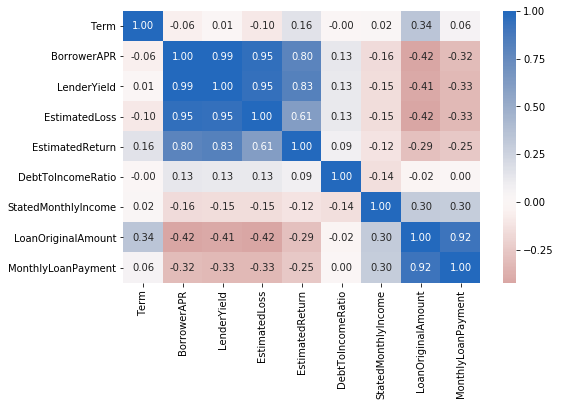

In [22]:
# plotting correlation plot between all the numerical variables
plt.figure(figsize = [8, 5])
sb.heatmap(loan_clean[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

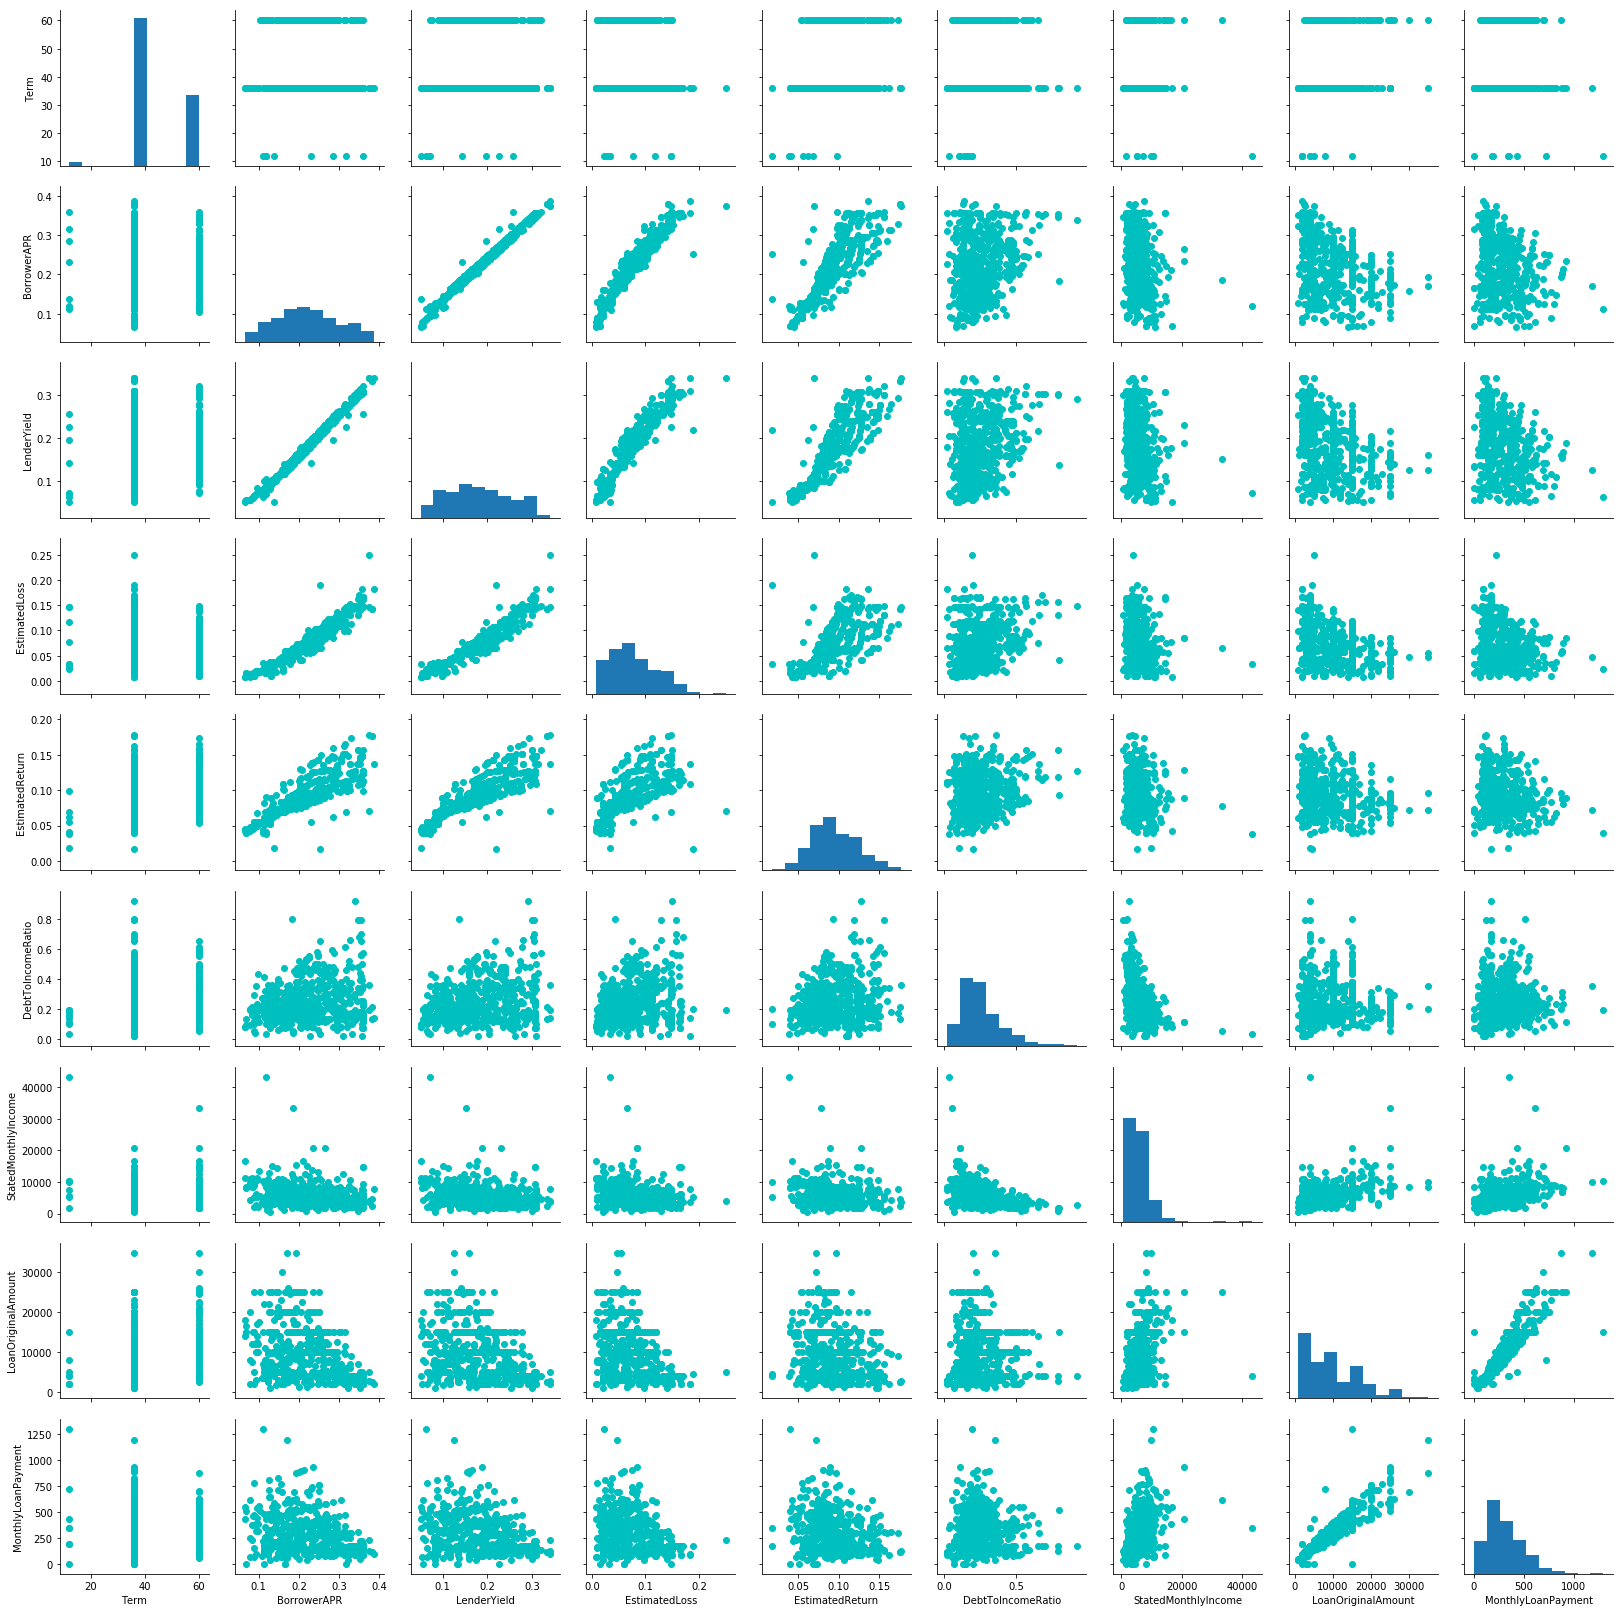

In [23]:
#sampling of 500loans to avoid overplotting in small plot and for faster rendering
loan_sample = loan_clean.sample(n=500,replace=False)

g = sb.PairGrid(data = loan_sample, vars = numeric_vars)
g = g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, color='c');


As expected , `BorrowerAPR`, `lenderYield`,`EstimatedLoss` and `EstimatedReturn` are all highly correlated with one another and they are moderately negative correlated with `LoanOriginalAmount` and `MonthlyLoanPayment`. 

It is not suprising that `LenderYield` is highly correlated with the `BorrowerAPR` since lender yield is equal to the interest rate on the loan minus the servicing fee while Annual Percentage Rate (APR) is the cost of credit as a yearly rate. So, higher APR is expected to lead to higher lender yield as well as their estimated return and estimated loss.

Since `LoanOriginalAmount` is positively correlated with `MonthlyLoanPayment`, any other feature that are correlated with loan amount is automatically correlated with monthly loan payment.

It is also expected that when the loan amount is high, the borrower are expected to make higher monthly pyment, but it could also depends on the term. Borrower who take longer term usually want to reduce their monthly payment but any trend regarding this is not really visible from above plots which is against the `Term`.

There is a weak negative correlation between the `DebtToIncomeRatio`(DIR) and `StatedMonthlyIncome`. I will explore the DIR in more details later.




Let's move to categorical variables and see how our feature of interests correlate with the variables.  

/usr/local/miniconda3/lib/python3.5/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


<Figure size 720x720 with 0 Axes>

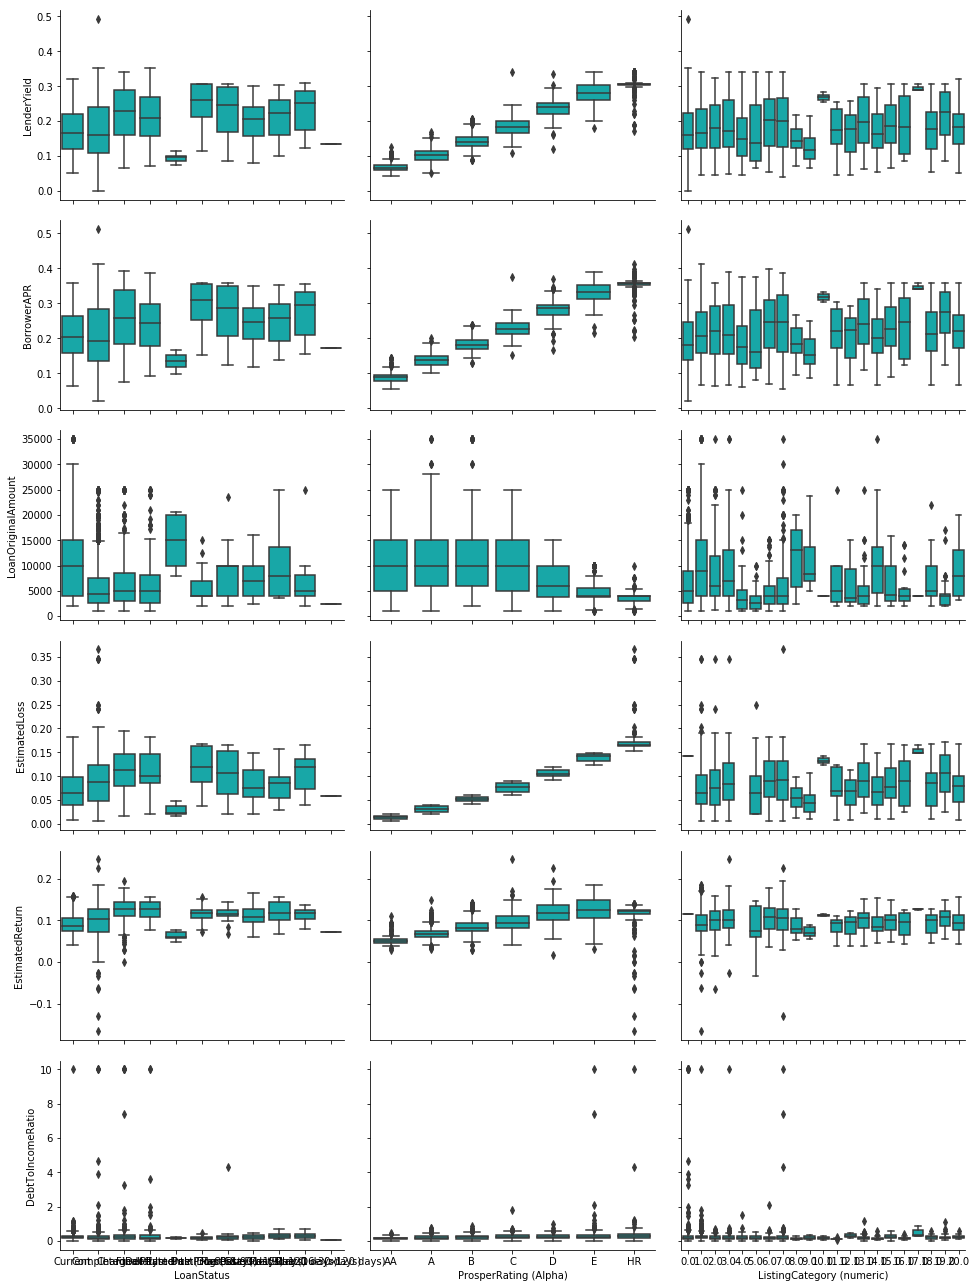

In [24]:
# plot matrix of numeric features against categorical features.
# larger sample is use for this part

samples = np.random.choice(loan.shape[0], 5000, replace = False)
loan_samp = loan.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = 'c')

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_samp, y_vars = ['LenderYield','BorrowerAPR', 'LoanOriginalAmount','EstimatedLoss',
       'EstimatedReturn','DebtToIncomeRatio'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

Since we know from before that the `LenderYield` is positively correlated with the `BorrowerAPR`, categorical plots against the lender yield look almost identical to the categorical plots against the APR.

It is very interesting to see that almost all numerical variables correlate with the `ProsperRating (Alpha)` except `DebtToIncomeRatio`. This is because Debt to income ratio(DIR) has a few outliers that are far from their median values. I will explore DIR later with log transformation on the y axis.

As expected the `ProsperRating (Alpha)` is highly correlated with the `BorrowerAPR`. As the risk go up starting with the lowest, from AA to HR(High Risk); the median of the borrower APR tends to go up as well. Prosper rating of E which lies in between the medium and high risk seems to have the largest APR value while the highest risk borrower with rating of HR  have a very small range with a few of lower and upper outliers. The same trend is observed for the plot of `LenderYield` against `ProsperRating (Alpha)`.

Meanwhile, in the box plot of the prosper rating and the `LoanOriginalAmount` the median value for the loan amount of the low risk to medium risk starting from AA, A, B to C are about the same which is around 10,000 USD. From the medium risk moving to high risk, the median gets lower and their range get smaller significantly.

`EstimatedLoss` and `EstimatedReturn` against the Prosper rating also show some significant trends that is worth to explore more in details later.
 
It is a bit hard to observed the categorical variable of `LoanStatus` as they are divided into a few categories. Hence, I will focus on the completed, defaulted and charged off loans only for further investigation on this variable.
 
`ListingCategory (numeric)`  however don't show any strong correlation with other numerical variables. I will perform further analysis next to see their distribution on defaulted loans to see if there is any interesting distribution.



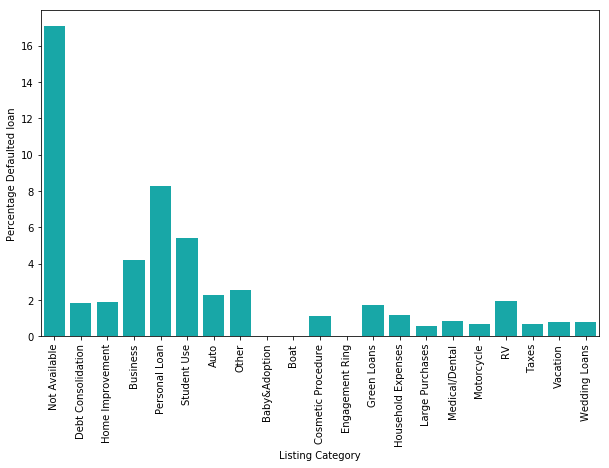

In [25]:
#the defaulted loan only
def_loan=loan[loan.LoanStatus.isin(["Defaulted"])]

#plotting barplot for proportion of defaulted loans to the total loans based of their listing category

prop_cat=def_loan['ListingCategory (numeric)'].value_counts() / loan['ListingCategory (numeric)'].value_counts(sort=False) *100

plt.figure(figsize=[10,6])
sb.barplot(prop_cat.index.values,prop_cat,color='c')

list_cat=['Not Available', 'Debt Consolidation', 'Home Improvement','Business','Personal Loan','Student Use',
         'Auto', 'Other','Baby&Adoption','Boat', 'Cosmetic Procedure','Engagement Ring','Green Loans',
         'Household Expenses','Large Purchases', 'Medical/Dental','Motorcycle','RV','Taxes','Vacation',
         'Wedding Loans']

plt.xticks(np.arange(21), list_cat,rotation=90)
plt.xlabel('Listing Category')
plt.ylabel('Percentage Defaulted loan');



The above plot shows the proportion of defaulted loan across all the categories. The probability for the borrower who take loan for Baby&Adoption, Boat and Engagement Ring to be defaulted are very unlikely as their percentage are zero from the above plot. Excluding the 18% in the not available category, the highest percentage of defaulted loan are in Personal Loan with around 8% followed by Student with around 5% and for business purpose which is around 4%.

Next I want to see the d

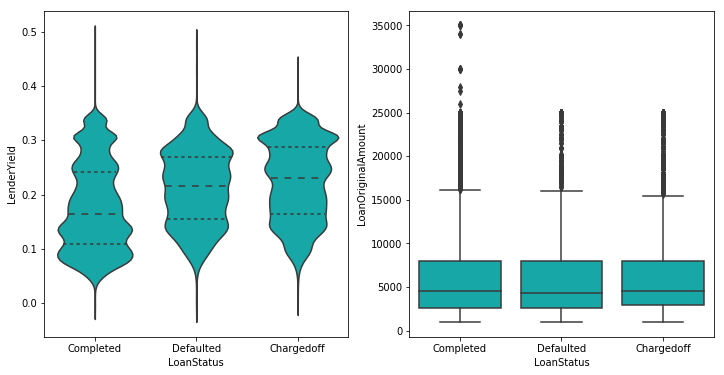

In [26]:
ComDefChar=loan[loan.LoanStatus.isin(['Completed','Defaulted','Chargedoff'])]

plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
ax0= sb.violinplot(data=ComDefChar,x='LoanStatus',y='LenderYield',color='c',inner='quartile');

plt.subplot(1, 2, 2)
ax1= sb.boxplot(data=ComDefChar,x='LoanStatus',y='LoanOriginalAmount',color='c');


Plot above are based on the data of 3 groups in loan status which are completed, charged off and defaulted loans. It is interestesting how violin plot shows that the wider curve for completed loan is on the lower part od the distribution while the curve is wider on top for both defaulted and charged off loans. The median and quartile values for completed loans are also lower than the other two loan status. 

The boxplot however didn't show any significant differance on the loan original amount against the three loan status except for their outliers. Those completed loan lent by Prosper are as high as 35k while the maximum loan original amount for defaulted and charged off loan is 25k.

Text(0.5,1,'Loan Original Amount for defaulted loans by Terms')

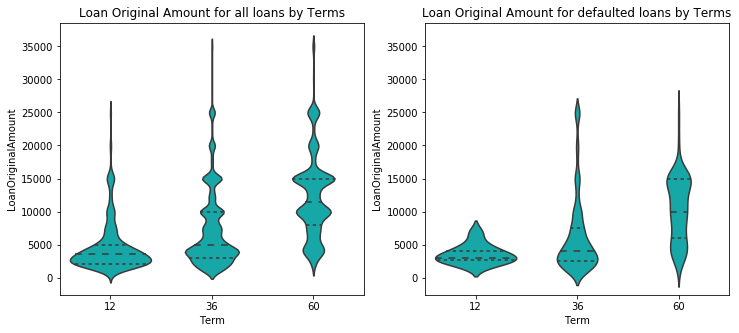

In [27]:
plt.figure(figsize = [12, 5])

# upper left plot: violin plot for whole loan
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=loan,x='Term',y='LoanOriginalAmount',color='c',inner='quartile')
plt.title('Loan Original Amount for all loans by Terms')

# upper right plot: violin plot for defaulted loan 
plt.subplot(1, 2, 2)
ax2= sb.violinplot(data=def_loan,x='Term',y='LoanOriginalAmount',color='c',inner='quartile')
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.title('Loan Original Amount for defaulted loans by Terms')


The loan original amount take on different shape for each term in the both violin plots. The main difference between this two plots are that defaulted loans has less wider range of loan amount for each term. For 12 months term, the curve is wider at around 2500 to 3000 amount of loan for both plot. But for defaulted loans for 3 year and 5 years term have narrower width compare to the whole loan all together.

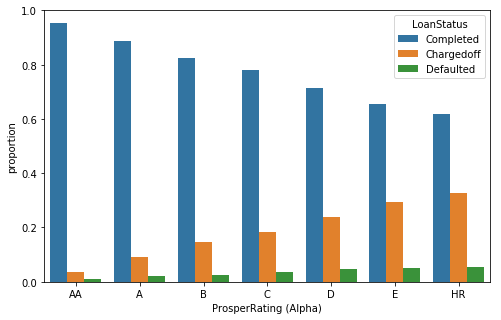

In [28]:
plt.figure(figsize = [8, 5])

x, y, hue = "ProsperRating (Alpha)", "proportion", "LoanStatus"
#hue_order = ["Completed", "Defaulted"]

(ComDefChar[hue]
 .groupby(ComDefChar[x])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sb.barplot, "data"), x=x, y=y, hue=hue));

Instead of plotting the absolute frequency,I plotted the proportion of completed, charged off and defaulted loan against each risk rating category for more fair comparison. This clustered bar chart show that for each group the completed loan has the highest percentage followed by charged off and then defaulted.

As the level of the risk increase from AA to HR, the percentage of the completed loan decrease while the charged off and defaulted loans increase with charged off having higher increase rate than defaulted.

This show the trend that higher risk borrower are more likely to be defaulted or charged off compare to lower risk borrower.

/usr/local/miniconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


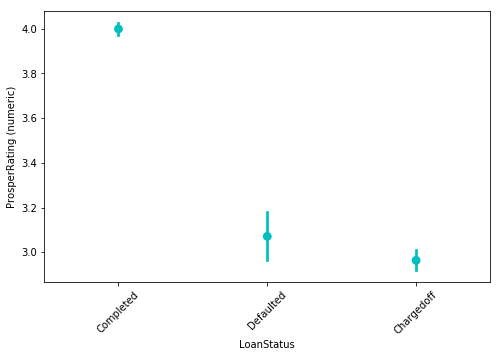

In [29]:
plt.figure(figsize = [8, 5])
data=loan_clean[loan_clean.LoanStatus.isin(['Completed','Chargedoff','Defaulted'])]
sb.pointplot(data =data , x='LoanStatus', y = 'ProsperRating (numeric)',color='c',linestyles=" ");
#plt.legend(['HR', 'E', 'D' ,'C', 'B', 'A', 'AA']);
plt.xticks(rotation=45);

In this plot, `ProsperRating (numeric)` variable is used. In this numerical values in this variable represented as 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. 1 ia for the highest risk rating while 7 is for lowest risk.

Instead of plotting for each category, I calculated the mean rating value and ploted them against each loan status. Loan with charged off status has the lowest mean rating amongst the three loan status with defaulted not far from the value. Completed have the mean rating value of 4 which indicated the medium risk.

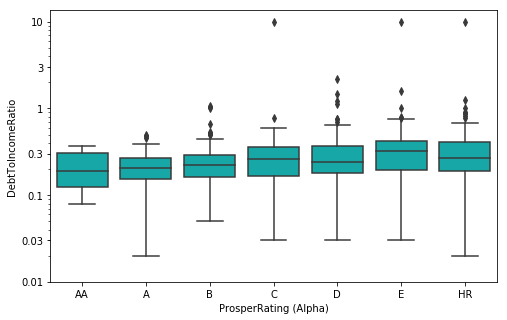

In [30]:
plt.figure(figsize = [8, 5])

ax2=sb.boxplot(data = def_loan, x='ProsperRating (Alpha)', y = 'DebtToIncomeRatio',color='c')
plt.yscale('log')
yticks= [0.01,0.03,0.1,0.3,1,3,10]
plt.yticks(yticks,yticks);


It is interesting to discover from the boxplot above that 75% of borrower in each risk level have DIR less than 0.5 and lowest risk level AA has the shortest range of the debt to income ratio (DIR) and highest risk HR has the largest range of DIR value with a few of outiers.

Apart from that there is no other significant diffence between the Prosper Rating and the DIR. I was expecting that there will be some obvious trend of higher risk borrower having higher debt to income ratio and vice versa. However we can see that the mean debt to income ratio value for medium to high risk are just slightly higher than lower risk borrower (AA,A,B). 

I will explore more on this together with the loan status of completed, charged off and defaulted if there is any interesting trend that could appear.


/usr/local/miniconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


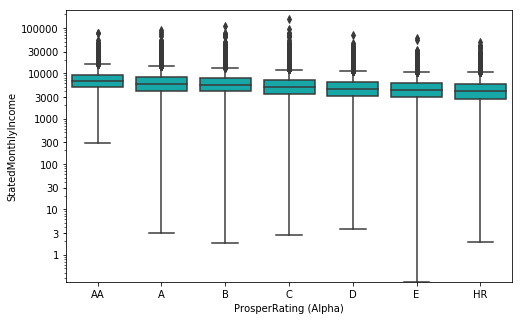

In [31]:

plt.figure(figsize = [8, 5])
sb.boxplot(data = loan_clean, x='ProsperRating (Alpha)', y = 'StatedMonthlyIncome',color='c')
plt.yscale('log')
yticks= [0,1,3,10,30,100,300,1000,3000,10000,30000,100000]
plt.yticks(yticks,yticks)
plt.ylim(0,250000);

Since `StatedMonthlyIncome` has a very large range of values,the data are transformed into log scale. All categories for `ProsperRating (Alpha)` have a long bottom whiskers which indicate a large range between the first quartiles and the minimum value especially for prosper rating E.


long whiskers below first quartile
outliers all above 3rd quartile

/usr/local/miniconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


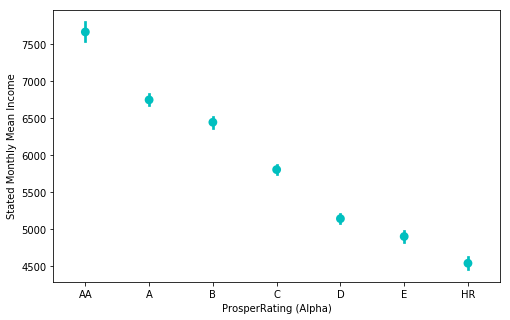

In [44]:
plt.figure(figsize = [8, 5])
sb.pointplot(data = loan, x='ProsperRating (Alpha)', y = 'StatedMonthlyIncome',color='c',linestyles=" ")
plt.ylabel('Stated Monthly Mean Income');

This mean plot looks more interesting compared to the box plot before. It shows how the mean value of the monthly income of borrower in each risk level decrease as we move from lowest risk borrower to highest risk borrower.
The total range difference from highest risk and lowest risk in term of their stated monthly mean income is more or less 3000k.

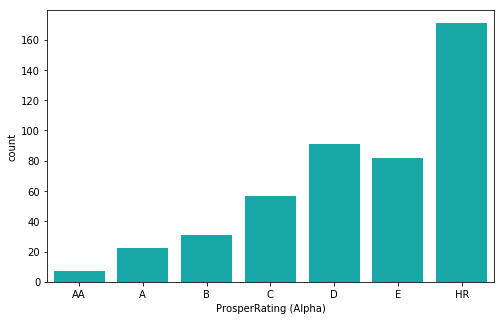

In [33]:
#change the monthly income to see the trend
plt.figure(figsize = [8, 5])
low_income=loan_clean[loan_clean.StatedMonthlyIncome<1000]
sb.countplot(data=low_income,x= 'ProsperRating (Alpha)',color='c');

The plot above show the distribution of low income borrower (in this case less than 1000 per month) against the prosper rating. For this low income the frequency is really high for high risk borrower and lowest for low risk borrower. I will explore about the income in the nexy part in multivariate exploration.

/usr/local/miniconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


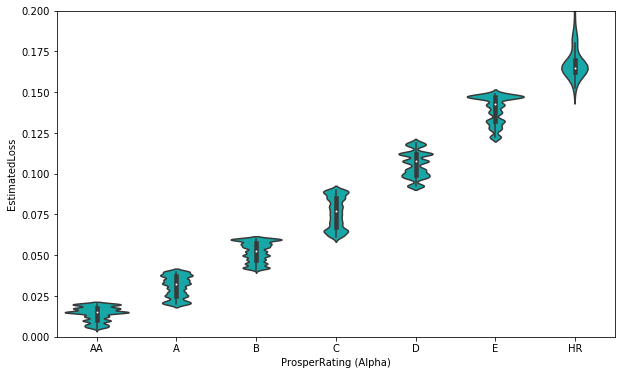

In [34]:
plt.figure(figsize=[10,6])
sb.violinplot(data=loan,x='ProsperRating (Alpha)',y='EstimatedLoss',color='c')
plt.ylim(0,0.2);

We know from before that lender yield, borrower APR, estimated return and estimated loss correlate highly with each other. So when borrower APR correlated realtively high with prosper rating, it is the same for Estimated loss as shown in the violin plot above. High loss is estimated by higher risk group of borrower which goes between 15% to 20% of loss. Even the range of estimated loss is larger for higher risk borrower. Estimated loss is the estimated principal loss on charge-offs. So if the charge off happen in the higher risk group, then higher loss Prosper have to bear. We will explore this in the next chapter to see which risk level have more charged off and their correlation to the loss. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>Loan status that we are interested in this dataset are charged off and defaulted loan. Completed loan are used as refence and also for comparison purposes. From this bivariate exploration part, what can be observed is that loan status had a surprisingly high amount of correlation with the Prosper rating. The pointplot of mean monthly income across prosper rating shows the trend with low risk group of borrower tends to have higher income than the high risk borrower. 

>BorrowerAPR, LenderYield, EstimatedLoss and EstimatedReturn all correlate with Prosper risk rating. All the rates increase as the listing risk goes up. This will have to be explored further in the next section.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is interesting to see which listing categories have the most defaulted loans. Top three of them are personal loan, bussiness loan and student loan. beside that the is also a correlation between the loan term and the loan original amount. There are only 3 categorical term in this dataset, 1 year,3years and 5 years which correspond to short, medium and long terms. The medium term has slightly higher range distribution of loan amount compare to shortest which mostly for smaller loan amount. Longest term has a significant distribution difference compare to other two terms.

## Multivariate Exploration

> In this part the main features to be focus on is the prosper rating and the loan status. I want to see how the financial background of the borrower (DIR and their monthly income) play into relationship with these interested features. 

/usr/local/miniconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


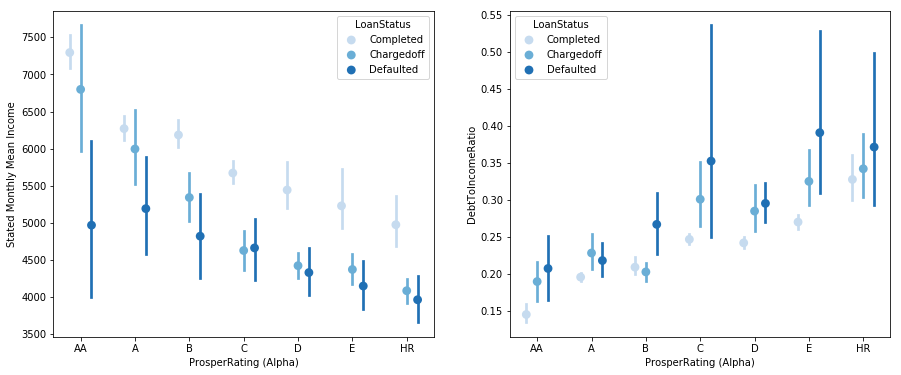

In [35]:
fig, ax = plt.subplots(ncols = 2, figsize = [15,6])
status_order=['Completed','Chargedoff','Defaulted']
sb.pointplot(data = ComDefChar, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'LoanStatus',
             hue_order=status_order,palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_ylabel('Stated Monthly Mean Income')

sb.pointplot(data = ComDefChar, x = 'ProsperRating (Alpha)', y = 'DebtToIncomeRatio', hue = 'LoanStatus',
             hue_order=status_order,palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[1]);

We know from previous EDA part that Prosper rating and loan status is highly correlated to each other. Both pointplots above show these two features correlate with stated monthly income and debt to income ratio. The overall trend show that when the borrower risk goes up starting from AA to HR, their stated monthly income decreases and their debt to income ratio increases.

In the left plot, the monthly mean income for  all risk rating show the same trend with completed loans having the highest monthly mean income, followed by charged off and defaulted loans. The range of the mean monthly income for charged off and defaulted decrease as the risk level increase.

While in the right plot, borrower that lead to defaulted loans have higher debt to income ratio for each risk rating. Even their DIR confidence interval for medium to high risk borrower is significantly large. The completed loan tends to have very small confidence interval of DIR comparing to charged off and defaulted loan for each risk rating. Borrower with high income and low DIR are more likely to complete the loan because they have more disposible income that could act as a buffer incase of emergency. Having high DIR especially for lower income borrower means they don't have this buffer incase emergency and are more incline to get loan defaulted. 

/usr/local/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  app.launch_new_instance()


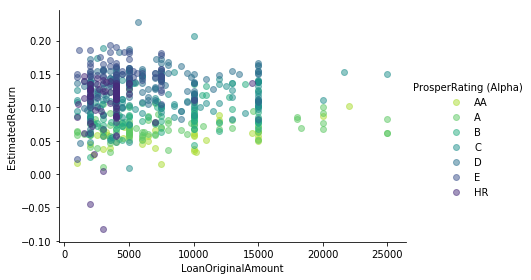

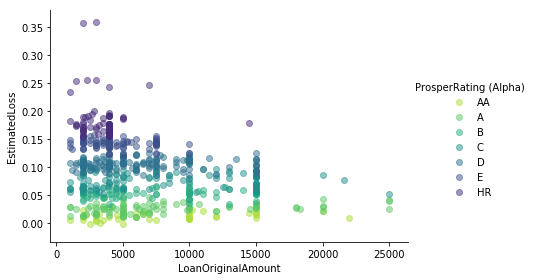

In [36]:
#reducing sample size to avoide overplotting
sample= np.random.choice(ComDefChar.shape[0],3000,replace=False)
ComDefChar_subset=ComDefChar.loc[sample]

#scatter plot showing the distribution of estimated return for all risk group 
#with ProsperRating set as the hue
g=sb.FacetGrid(data=ComDefChar_subset,hue='ProsperRating (Alpha)',
               height=4,aspect=1.5,palette='viridis_r')
x='LoanOriginalAmount'
y='EstimatedReturn'
g=g.map(sb.regplot,x,y,x_jitter=0.04,y_jitter=0.01,scatter_kws={'alpha':0.5},fit_reg=False)
g.add_legend()

#scatter plot showing the distribution of estimated loss for all risk group 
g=sb.FacetGrid(data=ComDefChar_subset,hue='ProsperRating (Alpha)',
               height=4,aspect=1.5,palette='viridis_r')
x='LoanOriginalAmount'
y='EstimatedLoss'
g=g.map(sb.regplot,x,y,x_jitter=0.04,y_jitter=0.01,scatter_kws={'alpha':0.5},fit_reg=False)

g.add_legend();

The scatter plots show the estimated return and estimated loss based on the loan original amount and the categories of risk rating. Estimated return is define by the difference between the Estimated Effective Yield and the Estimated Loss. Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees. 

Since loan amount correlate with APR, Estimated Return and loss also correlated with the loan amount as well as seen in the plots above. The plot shows an obvious trend as the risk move from lowest-risk to highest-risk Prosper rating the Estimated loss gets higher while the loan original amount gets smaller. 

The Estimated Return plot however doesn't show an abvious trend between each group of prosper rating category. Instead we can see that the points overlapped for low risk to medium risk for lower range values in estimated return and medium risk to high risk in the upper range value of estimated return with a few points of high risk  distributed in the below 0 value as well. The points are highly dense for loan amount of 5k and below and estimated return between 10-15%. Most of the points populated here are from medium to high risk rating.

This show that there is an uncertainty for investor especially for medium-risk to high-risk since the return could be negative.

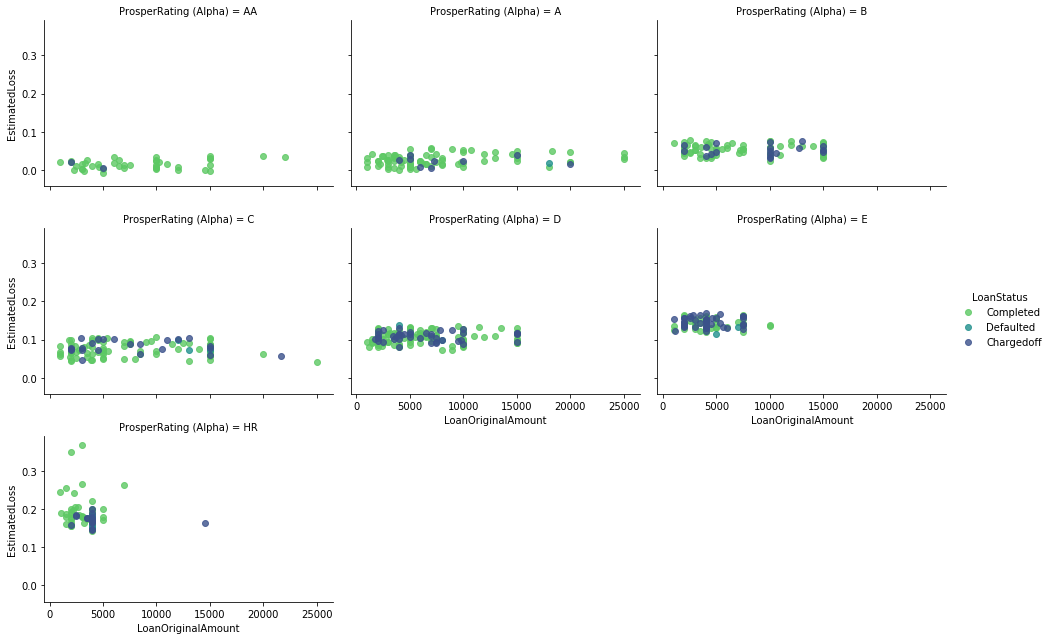

In [37]:
# scatter plots showing the distribution of estimated loss for each risk group 
#with LoanStatus set as the hue
g=sb.FacetGrid(data=ComDefChar_subset,col='ProsperRating (Alpha)',hue='LoanStatus',hue_order=['Completed','Defaulted','Chargedoff'],
               height=3,aspect=1.5,col_wrap=3,palette='viridis_r')
x='LoanOriginalAmount'
y='EstimatedLoss'
g=g.map(sb.regplot,x,y,x_jitter=0.04,y_jitter=0.02,scatter_kws={'alpha':0.8},fit_reg=False)
g.add_legend();


Estimated loss is the estimated principal loss on charge-offs. Plots above show that charged off happens more likely in the medium-risk D to highest-risk HR. The Estimated loss is highest for the HR prosper rating which mean any investor that invest in this group have higher risk incase the the loan turn to be charged off.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation on Prosper rating against loan status by looking at the mean on stated monthly income and DIR. The multivariate exploration here showed that there is correlation between all these features eventhough initially the DIR against prosper rating doesn't show a significant trend. 


### Were there any interesting or surprising interactions between features?

> It seems with a lower(high risk) Prosper rating, both Estimated Return and Estimated Loss tend to be higher generally. But the  Estimated return plot shows that the estimated return even becomes negative especially for rating “HR” which might be due to a large amount of charging on estimated uncollected interest on charge-offs.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!